# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,

Analyze relevant customer data,

Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



### Instructions

Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

First look at its main features (head, shape, info).

Rename the columns so they follow the PE8 (snake case).

Change effective to date column to datetime format.

Check NaN values per column.

Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Get categorical features.

What should we do with the customer_id column? 

### Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
 ### First look at its main features (head, shape, info).


In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns so they follow the PE8 (snake case).


In [5]:
customer_df.columns=[e.lower().replace(' ', '_') for e in customer_df.columns]  
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Change effective to date column to datetime format.


In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date)


In [7]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

### Check NaN values per column.


In [8]:
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()

In [9]:
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


###  Nan values do not look like an issue but during our exploration we noticed that there are columns with very high number of 0

In [10]:
customer_df['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [11]:
customer_df['income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

### Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical. 

### For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Get categorical features.

What should we do with the customer_id column?  Index it

we did both while exploring cat and num 

In [12]:
for i in customer_df.columns:
    print(str(i) + ' ' + str(len(customer_df[i].unique())))
# this returned all unique values per each columns to have an idea about what to clean up, we noticed that the column
# monthly_premium_auto 202 has only 202 marking a big discrepancy in data distributions from other 3 columns all above 5000
# total_claim_amount, customer_lifetime_value and income. We do not consider customer as is only unique values 


customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [13]:
cat = customer_df.select_dtypes('object')
num = customer_df.select_dtypes(np.number)

In [14]:
#returns all unique values in cat columns 
for i in cat:
    print(str(i) + ' ' + str(len(customer_df[i].unique())))

customer 9134
state 5
response 2
coverage 3
education 5
employmentstatus 5
gender 2
location_code 3
marital_status 3
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
vehicle_class 6
vehicle_size 3


In [15]:
#returns all unique values in num columns 
for i in num:
    print(str(i) + ' ' + str(len(customer_df[i].unique())))

customer_lifetime_value 8041
income 5694
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
total_claim_amount 5106


In [16]:
def catchange (customer_df):
    for catname in customer_df.columns:
        customer_df[catname]=[e.lower().replace(' ', '_') for e in customer_df[catname]]
    return customer_df
#replacing names 

In [17]:
cat=catchange(cat)


In [18]:
cat.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,bu79786,washington,no,basic,bachelor,employed,f,suburban,married,corporate_auto,corporate_l3,offer1,agent,two-door_car,medsize
1,qz44356,arizona,no,extended,bachelor,unemployed,f,suburban,single,personal_auto,personal_l3,offer3,agent,four-door_car,medsize
2,ai49188,nevada,no,premium,bachelor,employed,f,suburban,married,personal_auto,personal_l3,offer1,agent,two-door_car,medsize
3,ww63253,california,no,basic,bachelor,unemployed,m,suburban,married,corporate_auto,corporate_l2,offer1,call_center,suv,medsize
4,hb64268,washington,no,basic,bachelor,employed,m,rural,single,personal_auto,personal_l1,offer1,agent,four-door_car,medsize


In [19]:
numbernames=num.columns


In [20]:
continuous=[]
discrete= []
for i in numbernames:

    if len(customer_df[i].unique()) > 202:
        print("continuous")
        continuous.append(i)
        
        
    else:
        print("discrete")
        discrete.append(i)

continuous
continuous
discrete
discrete
discrete
discrete
discrete
continuous


In [21]:
DiscreteValues=customer_df[discrete]

In [22]:
ContinuousValues=customer_df[continuous]

In [23]:
def con_dis_classifier (df):
    continuous  = []
    discrete    = []
    cat = []
    for col in df.columns:
        if(customer_df[col].dtypes == object): #OBJECTS
            cat.append(str(col))
        else:
            if(customer_df[col].dtypes == np.number): #NUMBERS
                if (len(customer_df[col].unique())) > 202:
                    continuous.append(str(col))
                else:
                    discrete.append(str(col))
            else:
                cat.append(str(col))
            
    return continuous,discrete, cat
    

In [24]:
discrete

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [25]:
continuous

['customer_lifetime_value', 'income', 'total_claim_amount']

In [26]:
customer_df = customer_df.set_index("customer")
# indexing the customer column

In [27]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [28]:
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,bu79786,washington,no,basic,bachelor,employed,f,suburban,married,corporate_auto,corporate_l3,offer1,agent,two-door_car,medsize
1,qz44356,arizona,no,extended,bachelor,unemployed,f,suburban,single,personal_auto,personal_l3,offer3,agent,four-door_car,medsize
2,ai49188,nevada,no,premium,bachelor,employed,f,suburban,married,personal_auto,personal_l3,offer1,agent,two-door_car,medsize
3,ww63253,california,no,basic,bachelor,unemployed,m,suburban,married,corporate_auto,corporate_l2,offer1,call_center,suv,medsize
4,hb64268,washington,no,basic,bachelor,employed,m,rural,single,personal_auto,personal_l1,offer1,agent,four-door_car,medsize


In [29]:
cat = cat.set_index("customer")

In [30]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
bu79786,washington,no,basic,bachelor,employed,f,suburban,married,corporate_auto,corporate_l3,offer1,agent,two-door_car,medsize
qz44356,arizona,no,extended,bachelor,unemployed,f,suburban,single,personal_auto,personal_l3,offer3,agent,four-door_car,medsize
ai49188,nevada,no,premium,bachelor,employed,f,suburban,married,personal_auto,personal_l3,offer1,agent,two-door_car,medsize
ww63253,california,no,basic,bachelor,unemployed,m,suburban,married,corporate_auto,corporate_l2,offer1,call_center,suv,medsize
hb64268,washington,no,basic,bachelor,employed,m,rural,single,personal_auto,personal_l1,offer1,agent,four-door_car,medsize


In [31]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


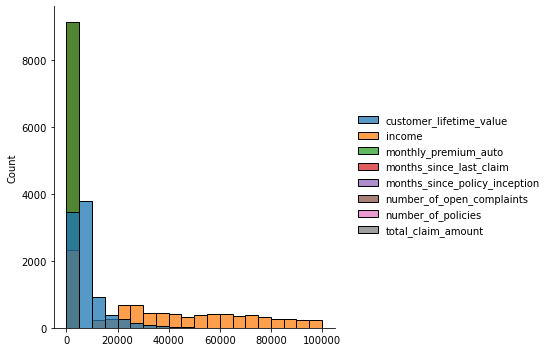

In [32]:
sns.displot(num, bins=20)


In [33]:
#for x in num.columns:
#    plt.hist(num[x], bins=10)
#    plt.show()

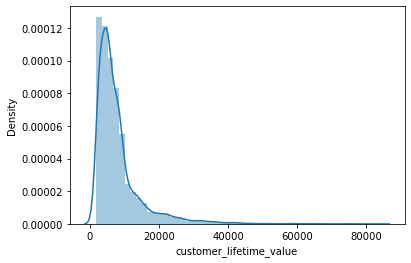

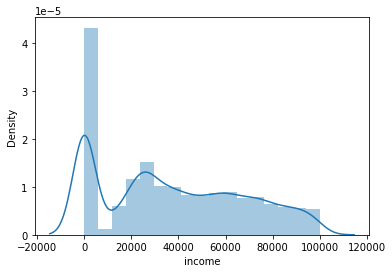

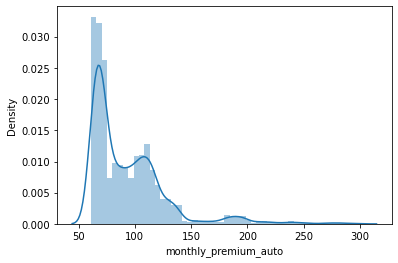

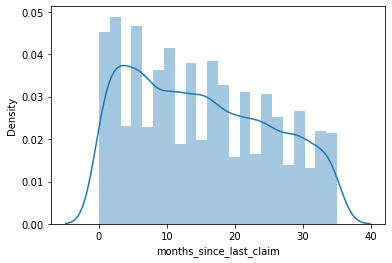

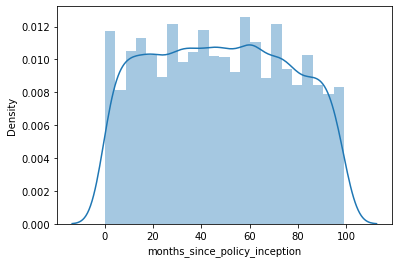

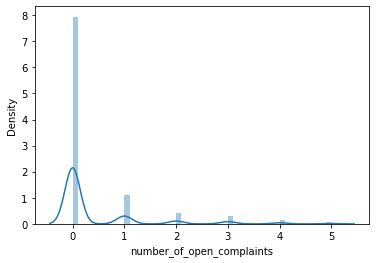

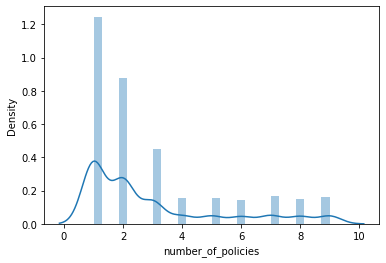

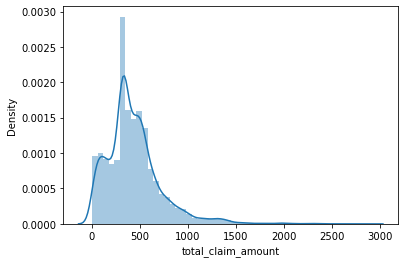

In [34]:
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()
        
distplot_df(num)


# LAB 2
Plot a correlation matrix, what can you see?


Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).


What can you see in the plots?


Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


Have you found outliers? If you have, what should we do with them?


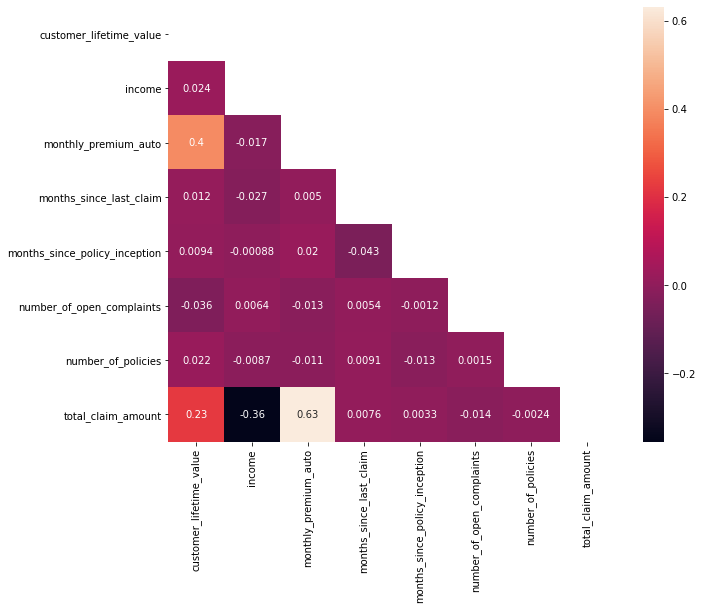

In [35]:

correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### The correlation matrix shows high correlation between monthly_premium_auto and total_claim_amount

discrete plot
['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

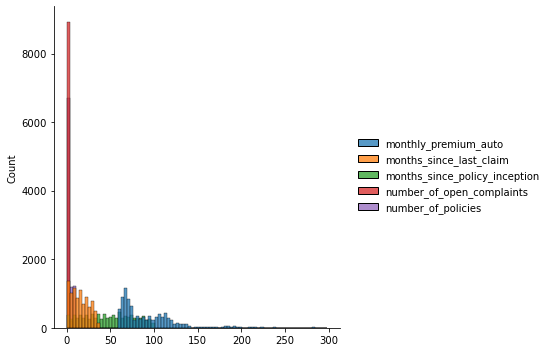

In [36]:
sns.displot(customer_df[discrete])
plt.show()

checking the distributions on num columns from correlation matrix

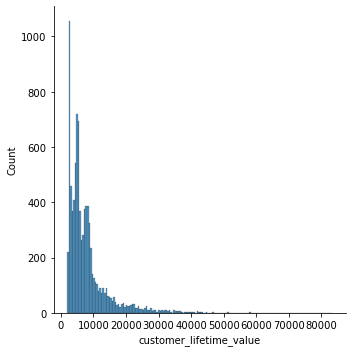

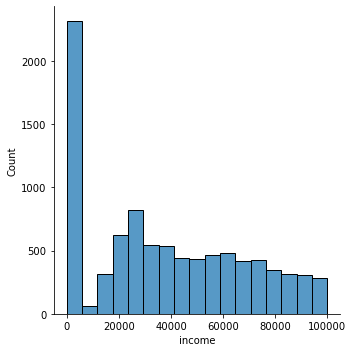

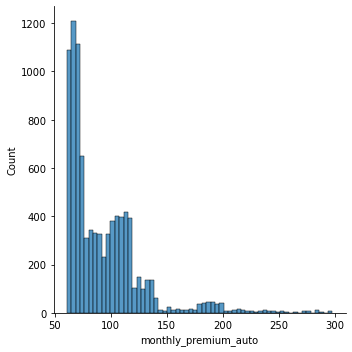

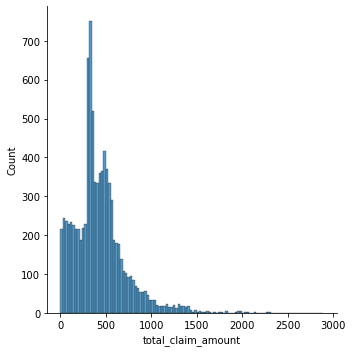

In [37]:
sns.displot(customer_df['customer_lifetime_value'])
plt.show()

sns.displot(customer_df['income'])
plt.show()

sns.displot(customer_df['monthly_premium_auto'])
plt.show()

sns.displot(customer_df['total_claim_amount'])
plt.show()

In [38]:
def myplot(customer_df, exclude):
    
    for i in customer_df:
        
        if i != exclude:
        
            if len(customer_df[i].unique()) > 10:
            
                sns.distplot(customer_df[i], label = i)
                plt.show()
        
            else:
                sns.countplot(customer_df[i], label = i)
                plt.show()


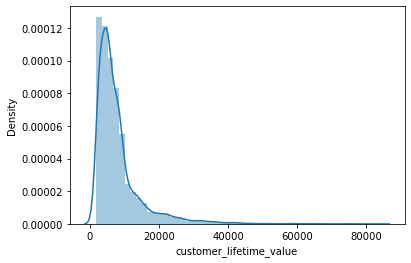

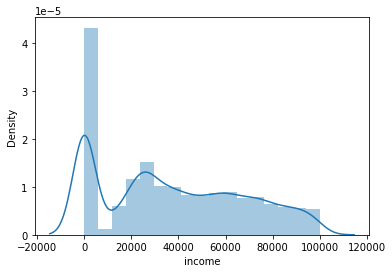

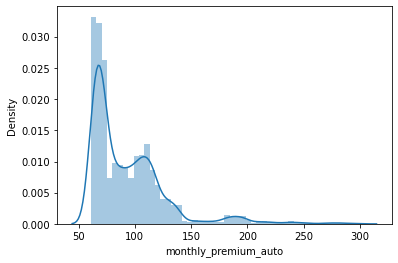

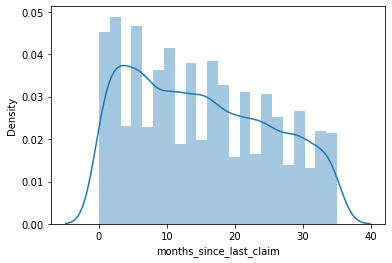

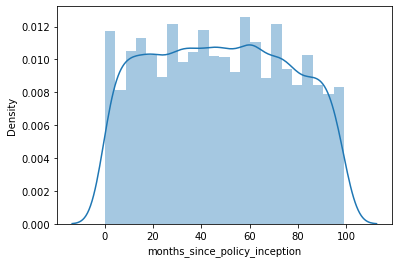

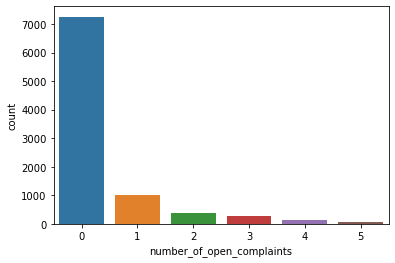

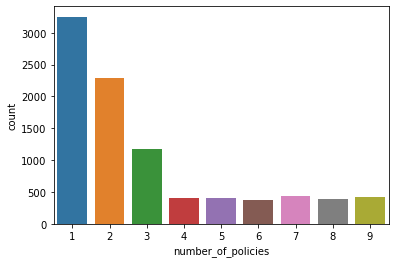

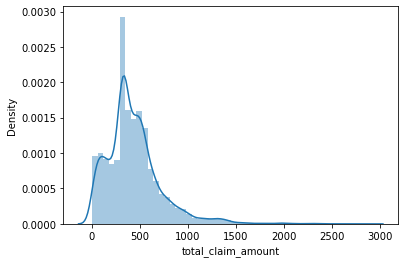

In [39]:
myplot(num, 'Effective To Date')


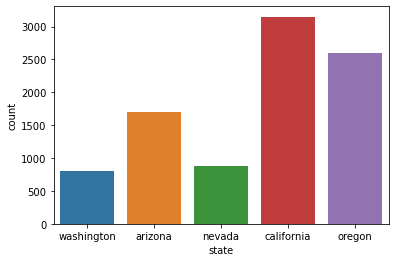

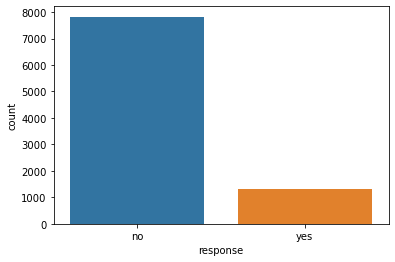

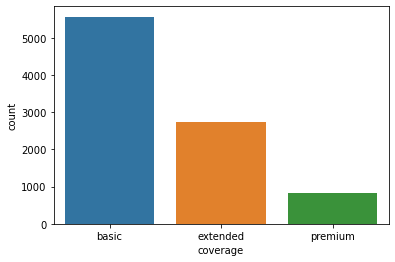

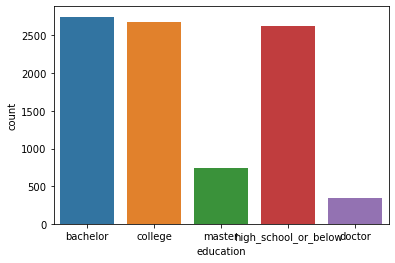

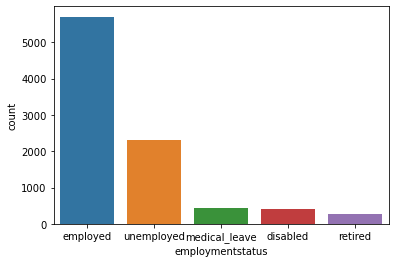

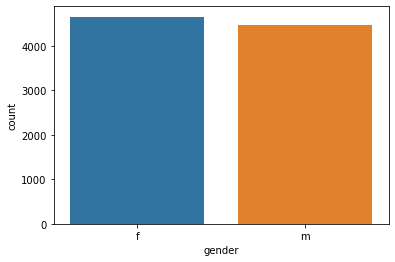

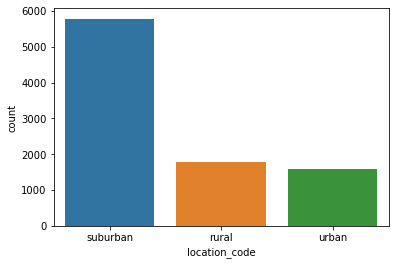

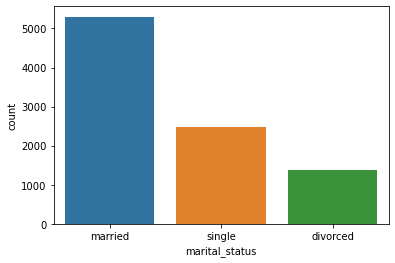

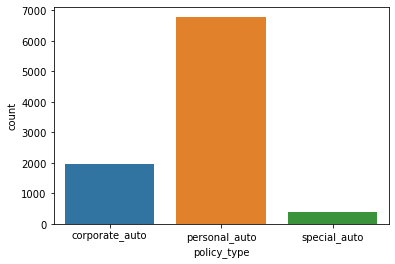

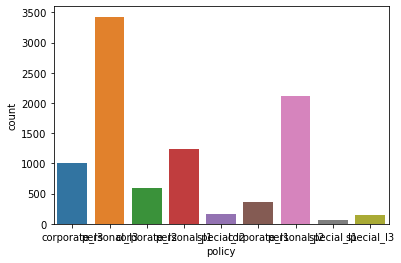

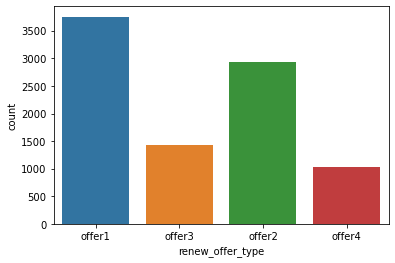

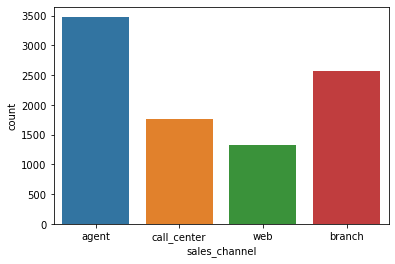

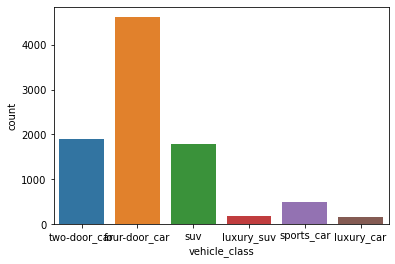

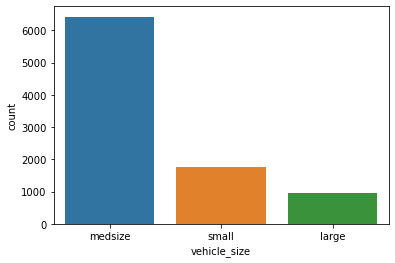

In [40]:
myplot(cat, 'Effective To Date')



## Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


Have you found outliers? If you have, what should we do with them?

In [41]:
def myboxplot(customer_df):
    
    for i in customer_df:
        sns.boxplot(x=i, data=customer_df)
        plt.show()
        
    return

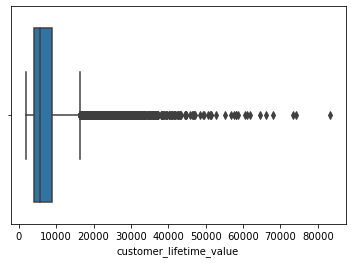

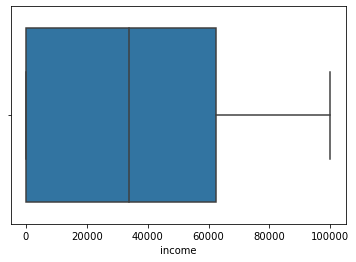

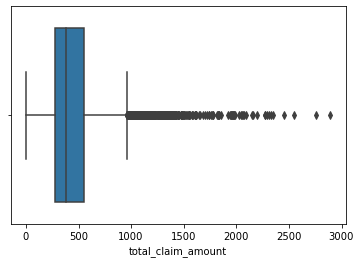

In [42]:
myboxplot(customer_df[continuous])
# work on outliers for monthly_premium_auto, total_claim_amount, drop number_of_complaints, change the 0 with the mean for income


In [43]:
#myboxplot(customer_df[continuous])


[(-0.5, 10.0)]

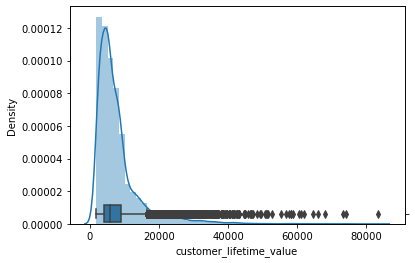

In [44]:
ax = sns.distplot(customer_df['customer_lifetime_value'])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['customer_lifetime_value'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

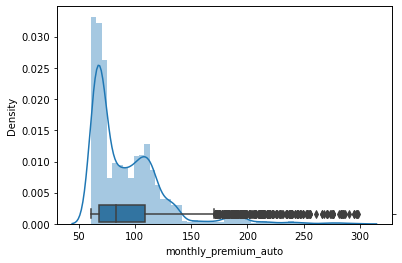

In [45]:
ax = sns.distplot(customer_df['monthly_premium_auto'])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['monthly_premium_auto'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

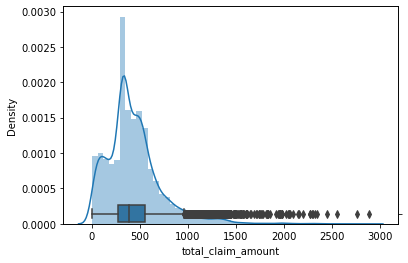

In [46]:
ax = sns.distplot(customer_df['total_claim_amount'])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['total_claim_amount'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

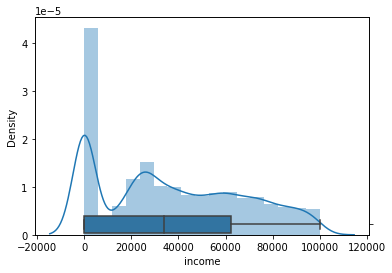

In [47]:
ax = sns.distplot(customer_df['income'])
ax2 = ax.twinx()
sns.boxplot(x=customer_df['income'], ax=ax2)
ax2.set(ylim=(-.5, 10))

#### FILTERING OUT THE OUTLIERS PANDA's APPROACH

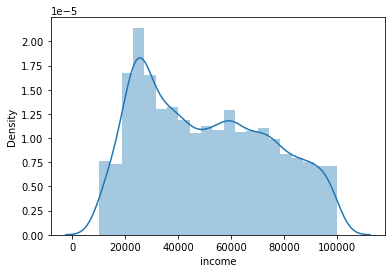

In [48]:
customer_df = customer_df[customer_df['income'] > 10000]
sns.distplot(customer_df['income'])
plt.show()

#filtered out 0 on income

For 0 values in income I could have also used a function

vals = pd.DataFrame(customer_df['income'].value_counts())

vals = vals.reset_index()

vals.columns = ['income', 'counts']

df_income = vals[vals['counts']>10000]

df_income = list(df_income['income'])

df_income

def clean_income(x):
    
    
    if x in df_income:
        
        return x
    



customer_df['income'] = list(map(clean_income, customer_df['income']))

The upper wisker is at: 16553.29
The number of points outise the upper wisker is:  596


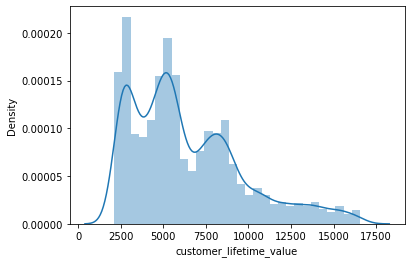

In [49]:
iqr = np.percentile(customer_df['customer_lifetime_value'],75) - np.percentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.percentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = customer_df[customer_df['customer_lifetime_value'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
customer_df = customer_df[customer_df['customer_lifetime_value'] < upper_limit]
sns.distplot(customer_df['customer_lifetime_value'])
plt.show()

The upper wisker is at: 165.50
The number of points outise the upper wisker is:  223


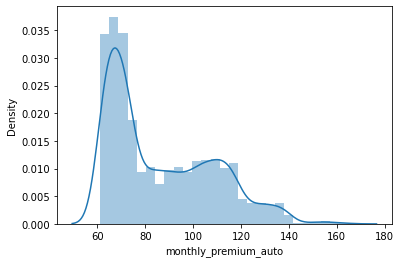

In [50]:
iqr = np.percentile(customer_df['monthly_premium_auto'],75) - np.percentile(customer_df['monthly_premium_auto'],25)
upper_limit = np.percentile(customer_df['monthly_premium_auto'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = customer_df[customer_df['monthly_premium_auto'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
customer_df = customer_df[customer_df['monthly_premium_auto'] < upper_limit]
sns.distplot(customer_df['monthly_premium_auto'])
plt.show()

The upper wisker is at: 880.20
The number of points outise the upper wisker is:  64


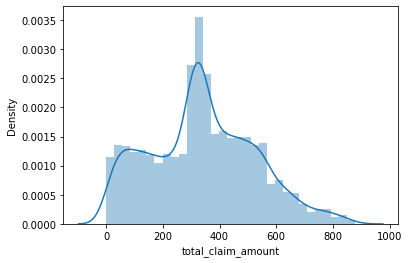

In [51]:
iqr = np.percentile(customer_df['total_claim_amount'],75) - np.percentile(customer_df['total_claim_amount'],25)
upper_limit = np.percentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = customer_df[customer_df['total_claim_amount'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
customer_df = customer_df[customer_df['total_claim_amount'] < upper_limit]
sns.distplot(customer_df['total_claim_amount'])
plt.show()

In [52]:
#education and employment, we will check how do they relate to establish a decision 

In [53]:
customer_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [54]:
customer_df['employmentstatus'].unique()

array(['Employed', 'Medical Leave', 'Disabled', 'Retired'], dtype=object)

In [55]:
data_crosstab = pd.crosstab(customer_df['education'], customer_df['employmentstatus'], margins = False)
data_crosstab

employmentstatus,Disabled,Employed,Medical Leave,Retired
education,,,,
Bachelor,109,1471,106,74
College,88,1469,127,93
Doctor,19,229,12,1
High School or Below,95,1308,100,72
Master,37,482,25,17


In [56]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstab.columns, index=data_crosstab.index)

The Chi2 value is:  27.16
The p-value is:  0.007324579510897852
The number of degrees of freedom is:  12
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired
education,,,,
Bachelor,103.215369,1470.819009,109.740479,76.225143
College,104.212336,1485.025784,110.800472,76.961409
Doctor,15.306370,218.115774,16.274014,11.303842
High School or Below,92.366026,1316.215875,98.205258,68.212841
Master,32.899899,468.823559,34.979778,24.296764


Let's use the usual confidence level of 95%.

Chi 2 =27.16 DF=12
The two-tailed P value is less than 0.05 (the complementary 5%) 21.03<27.16

We reject the nul hypotheses columns education and employmentstatus are related.

decision: we can drop education as it has more columns 

In [57]:
customer_df.drop('education', axis = 1, inplace = True)

In [58]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
HB64268,Washington,2813.692575,No,Basic,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,2011-02-24,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [59]:
#gender and employment, we will check how do they relate to establish a decision 

In [60]:
customer_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [61]:
data_crosstab = pd.crosstab(customer_df['gender'], customer_df['employmentstatus'], margins = False)
data_crosstab

employmentstatus,Disabled,Employed,Medical Leave,Retired
gender,,,,
F,210,2532,194,113
M,138,2427,176,144


In [62]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstab.columns, index=data_crosstab.index)

The Chi2 value is:  17.22
The p-value is:  0.000638191525723886
The number of degrees of freedom is:  3
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired
gender,,,,
F,178.808898,2548.026795,190.112909,132.051399
M,169.191102,2410.973205,179.887091,124.948601


Let's use the usual confidence level of 95%.

Chi 2 =17.22 DF=3
The two-tailed P value is less than 0.05 (the complementary 5%) 7.82<17.22

We reject the nul hypotheses columns gender and employmentstatus are related.

decision: we can drop employmentstatus as it has more columns 

In [63]:
customer_df.drop('employmentstatus', axis = 1, inplace = True)

In [64]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,2011-02-24,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,2011-02-19,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
HB64268,Washington,2813.692575,No,Basic,2011-02-03,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,2011-01-25,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,2011-02-24,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [65]:
#state and location_code, we will check how do they relate to establish a decision 

In [66]:
customer_df['state'].unique()

array(['Washington', 'Nevada', 'Oregon', 'California', 'Arizona'],
      dtype=object)

In [67]:
customer_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [68]:
data_crosstab = pd.crosstab(customer_df['state'], customer_df['location_code'], margins = False)
data_crosstab

location_code,Rural,Suburban,Urban
state,,,
Arizona,272,599,244
California,510,1073,463
Nevada,151,297,130
Oregon,414,877,385
Washington,126,281,112


In [69]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstab.columns, index=data_crosstab.index)

The Chi2 value is:  1.81
The p-value is:  0.9863563281518414
The number of degrees of freedom is:  8
The expected frequencies are: 


location_code,Rural,Suburban,Urban
state,,,
Arizona,276.777048,587.564038,250.658915
California,507.879676,1078.166835,459.953488
Nevada,143.477250,304.584766,129.937984
Oregon,416.034378,883.190428,376.775194
Washington,128.831648,273.493933,116.674419


Let's use the usual confidence level of 95%.

Chi 2 =1.81 DF=8
The two-tailed P value is less than 0.05 (the complementary 5%) 15.5>1.81

We confirm the nul hypotheses columns state and location_code are not related.

decision: we will not drop columns here 

## Make a copy of the dataframe you are using

In [70]:
data_copy=customer_df.copy()
data_copy.head()

,state,customer_lifetime_value,response,coverage,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,2011-02-24,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,2011-02-19,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
HB64268,Washington,2813.692575,No,Basic,2011-02-03,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,2011-01-25,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,2011-02-24,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [71]:
# Normalizing the continuous data

In [72]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(data_copy[continuous])
x_normalized = transformer.transform(data_copy[continuous])
x_normalized

array([[0.04904803, 0.99877307, 0.00682978],
       [0.25547847, 0.96674953, 0.01122966],
       [0.06405467, 0.99794144, 0.0031446 ],
       ...,
       [0.08553234, 0.99627142, 0.01129088],
       [0.14185909, 0.98973441, 0.01737212],
       [0.32425036, 0.94550225, 0.02978584]])

## Encode the categorical variables


Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
### One hot to state
### Ordinal to coverage
### Ordinal to employmentstatus (was dropped)
### Ordinal to location code
### One hot to marital status
### One hot to policy type
### One hot to policy
### One hot to renew offercustomer_df
### One hot to sales channel
### One hot vehicle class
### Ordinal vehicle size

In [73]:
data_copy['coverage'].value_counts()

Basic       3759
Extended    1739
Premium      436
Name: coverage, dtype: int64

In [74]:
vehicle_dict = {'Small':0, 'Medsize':1, 'Large':2}
data_copy['vehicle_size'] = data_copy['vehicle_size'].replace(vehicle_dict)
location_dict = {'Urban':0,'Rural':1,'Suburban':2 }
data_copy['location_code'] = data_copy['location_code'].replace(location_dict)
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
data_copy['coverage'] = data_copy['coverage'].replace(coverage_dict)

In [75]:
data_copy['coverage'].unique()

array([0, 2, 1], dtype=int64)

In [76]:
data_copy['vehicle_size'].unique()

array([1, 0, 2], dtype=int64)

In [77]:
data_copy['location_code'].unique()

array([2, 1, 0], dtype=int64)

In [78]:
cat2 = data_copy.select_dtypes('object')
num2 = data_copy.select_dtypes(np.number)

In [79]:
cat2

,state,response,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
customer,,,,,,,,,
BU79786,Washington,No,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
AI49188,Nevada,No,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
HB64268,Washington,No,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
OC83172,Oregon,Yes,F,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car
XZ87318,Oregon,Yes,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...
CB59349,California,No,M,Married,Personal Auto,Personal L3,Offer2,Agent,SUV
TF56202,California,No,M,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car
YM19146,California,No,F,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car


In [80]:
#df_index = cat2.index
#encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat2) 
#encoded = encoder.transform(cat2).toarray()
#encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [90]:
pd.get_dummies(data_copy,drop_first=True)


,customer_lifetime_value,coverage,effective_to_date,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,0,2011-02-24,56274,2,69,32,5,0,1,384.811147,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AI49188,12887.431650,2,2011-02-19,48767,2,108,18,38,0,2,566.472247,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
HB64268,2813.692575,0,2011-02-03,43836,1,73,12,44,0,1,138.130879,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OC83172,8256.297800,0,2011-01-25,62902,1,69,14,94,0,2,159.383042,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
XZ87318,5380.898636,0,2011-02-24,55350,2,67,0,13,0,9,321.600000,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CB59349,16261.585500,1,2011-01-20,60646,2,134,31,42,0,2,643.200000,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
TF56202,5032.165498,0,2011-02-12,66367,2,64,6,48,0,3,307.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
YM19146,4100.398533,2,2011-01-06,47761,2,104,16,58,0,1,541.282007,2,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [93]:
#data_copy['effective_to_date'].apply(lambda x:x.toordinal())


customer
BU79786    734192
AI49188    734187
HB64268    734171
OC83172    734162
XZ87318    734192
            ...  
CB59349    734157
TF56202    734180
YM19146    734143
PK87824    734180
UP19263    734171
Name: effective_to_date, Length: 5934, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

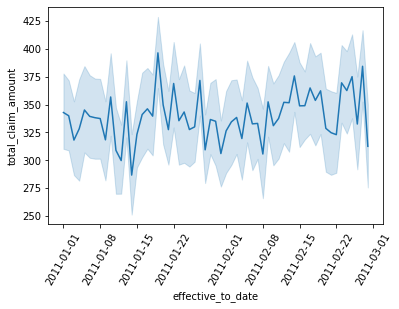

In [94]:
sns.lineplot(x = 'effective_to_date', y = 'total_claim_amount', data = data_copy) 
plt.xticks(rotation=60)
plt.show

In [104]:
data_copy['effective_to_date'].describe()

count                    5934
unique                     59
top       2011-02-14 00:00:00
freq                      135
first     2011-01-01 00:00:00
last      2011-02-28 00:00:00
Name: effective_to_date, dtype: object

In [105]:
import datetime as dt
import numpy as np
df = pd.DataFrame(index=pd.DatetimeIndex(start=dt.datetime(2011,1,1,0,0,0),
   end=dt.datetime(2011,2,28,0,0,0), freq='H'))\
   .reset_index().rename(columns={'index':'datetime'})
print("Sample datetime data:")
print(df.head(10))
df['ts'] = df.datetime.values.astype(np.int64) // 10 ** 9
print("\nConvert datetime to timestamp:")
print (df)

TypeError: __new__() got an unexpected keyword argument 'start'

In [87]:
#customer_df['effective_to_date'].apply(lambda x:x.toordinal())


In [88]:
#covert datetime to a timestamp and then use a min max scaler

In [89]:
#coverage to do and ordinalize some stuff to get less than 43 columns from get dummies 